Red Light Violation Data

In [164]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests

In [165]:
# Get csv files
# Chicago data
chicago_daycount_path = "../Chicago/Chicago_DayCountAll.csv"
chicago_hourcount_path  = "../Chicago/Chicago_HourCount.csv"
chicago_moutncount_path = "../Chicago/Chicago_MonthCount.csv"

chicago_daycount_df = pd.read_csv(chicago_daycount_path)
chicago_hourcount_df = pd.read_csv(chicago_hourcount_path)
chicago_moutncount_df = pd.read_csv(chicago_moutncount_path)

In [166]:
# chicago_moutncount_df
# chicago_hourcount_df.head()
# chicago_daycount_df.head()

In [171]:
# New York data
new_york_daycount_path = "../NY Red Light Violation/New_York_DayCount.csv"
new_york_hourcount_path = "../NY Red Light Violation/New_York_HourCount.csv"
new_york_monthcount_path = "../NY Red Light Violation/New_York_MonthCount.csv"

new_york_daycount_df = pd.read_csv(new_york_daycount_path)
new_york_hourcount_df = pd.read_csv(new_york_hourcount_path)
new_york_monthcount_df = pd.read_csv(new_york_monthcount_path)
new_york_daycount_df = new_york_daycount_df.rename(columns={'State':'Daily Count'})
chicago_daycount_df.head()

,date,Daily Total
0,2003-11-01,46
1,2003-11-02,31
2,2003-11-03,69
3,2003-11-04,57
4,2003-11-05,56


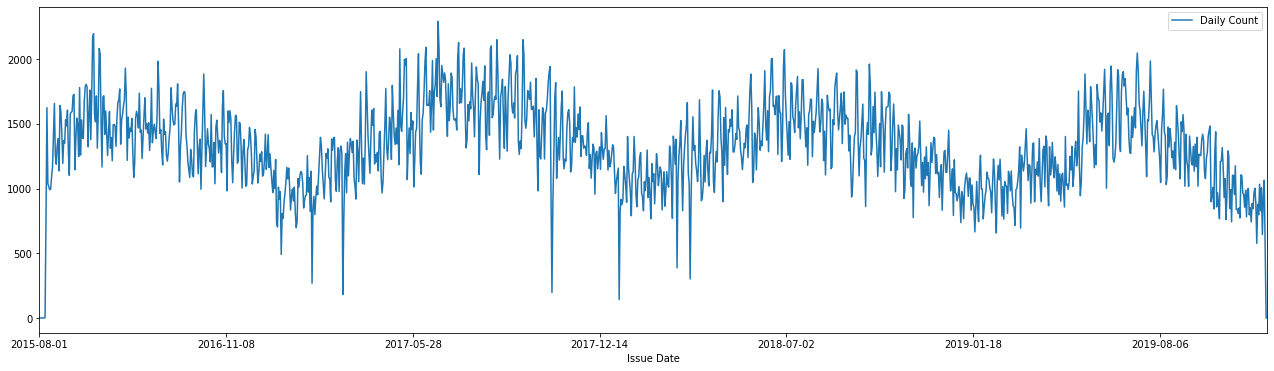

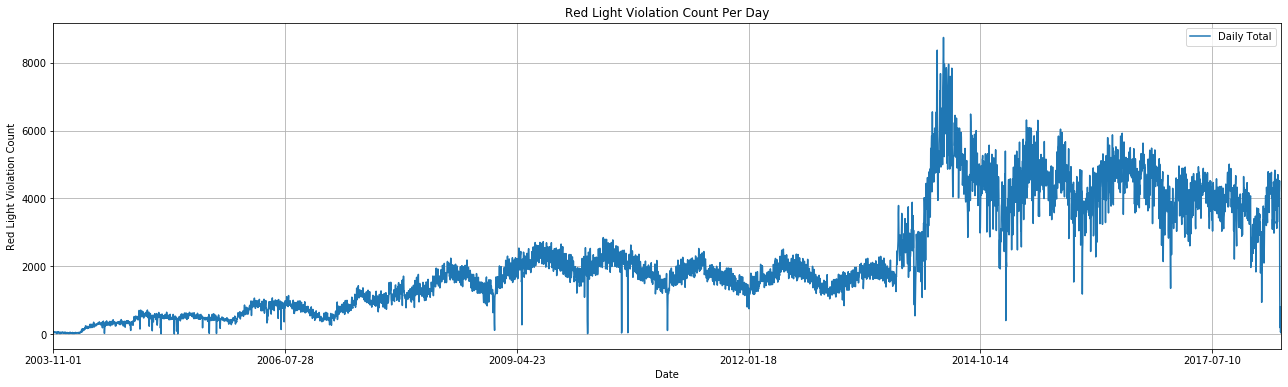

In [172]:
# plot data
# 1. Violation Per Day
new_york_daycount_df2 = new_york_daycount_df.set_index('Issue Date')
chicago_daycount_df2 = chicago_daycount_df.set_index('date')

new_york_daycount_df2.plot(kind="line", figsize=(22,6), label='New York')
chicago_daycount_df2.plot(kind="line", figsize=(22,6), label='New York')
# set labels and sticks
plt.title("Red Light Violation Count Per Day")
plt.xlabel("Date")
plt.ylabel("Red Light Violation Count")

# plt.style.use('seaborn-bright')
plt.legend()
plt.grid()
plt.savefig("DailyCount.png")
# Show plot
plt.show()

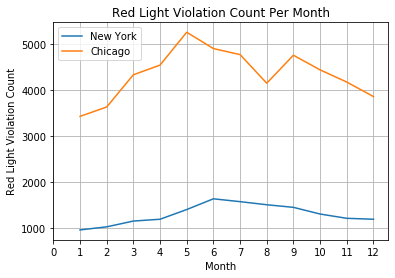

In [34]:
# plot data
# 2. Violation Per Hour
x_month = new_york_monthcount_df['Month']
y_month1 = new_york_monthcount_df['Average Count']
y_month2 = chicago_moutncount_df['Daily Avg']
plt.plot(x_month, y_month1, label='New York')
plt.plot(x_month, y_month2, label='Chicago')

# set labels and sticks
plt.title("Red Light Violation Count Per Month")
plt.xlabel("Month")
plt.ylabel("Red Light Violation Count")
plt.xticks(np.arange(0,13))

# plt.style.use('seaborn-bright')
plt.legend()
plt.grid()
plt.savefig("MonthlyCount.png")
# Show plot
plt.show()

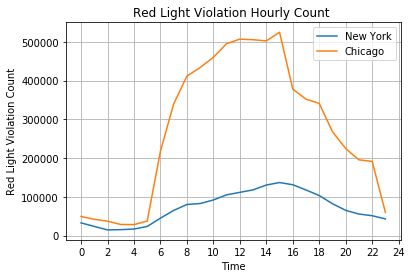

In [25]:
# plot data
# 3. Violation Per Hour
x_hour = new_york_hourcount_df['Hour']
y_hour1 = new_york_hourcount_df['Total']
y_hout2 = chicago_hourcount_df['Total']
plt.plot(x_axis, y_hour1, label='New York')
plt.plot(x_axis, y_hout2, label='Chicago')

# set labels and sticks
plt.title("Red Light Violation Hourly Count ")
plt.xlabel("Time")
plt.ylabel("Red Light Violation Count")
plt.xticks(np.arange(0,26,2))

# plt.style.use('seaborn-bright')
plt.legend()
plt.grid()
plt.savefig("HourCount.png")
# Show plot
plt.show()

Section 2 : Violation Count vs Tempurature

In [ ]:
# Read the temp csv file
temp_path = "../NOAAdata/daily_weather.csv"
daily_weather_df = pd.read_csv(temp_path)
daily_weather_df.head()

chicago_daycount_df2 = pd.read_csv("../Chicago/Chicago_DayCount.csv")
chicago_daycount_df2.head()

In [ ]:
# Select the weather data for New York
new_york_daily_weather = daily_weather_df.loc[(daily_weather_df['city'] == 'New York'), :]
new_york_daily_weather.head()

# Select the weather data for Chicago
chicago_daily_weather = daily_weather_df.loc[(daily_weather_df['city'] == 'Chicago'), :]
chicago_daily_weather.head()

In [123]:
# combine dataframes
new_york_daycount_df = new_york_daycount_df.rename(columns={'Issue Date':'date'})
combined_data_NY = pd.merge(new_york_daycount_df, new_york_daily_weather, on="date", how="outer")
combined_data_NY.head()

combined_data_CHI = pd.merge(chicago_daycount_df2, chicago_daily_weather, on="date", how="outer")
combined_data_CHI.count()

date           3652
Daily Total    1520
station        3652
PRCP           3652
SNOW           3652
TAVG           2466
TMAX           3652
TMIN           3652
city           3652
dtype: int64

In [144]:
# clean up the dataframe
NY_Daily_Weather = combined_data_NY.dropna(axis = 0, how='any')
NY_Daily_Weather = NY_Daily_Weather.drop(['station'], axis=1)
NY_Daily_Weather.head()

,date,Daily Count,PRCP,SNOW,TAVG,TMAX,TMIN,city
0,2015-08-01,1.0,0.00,0.0,82.0,91.0,74.0,New York
1,2016-01-20,1.0,0.00,0.0,32.0,40.0,28.0,New York
2,2016-02-29,1.0,0.06,0.0,48.0,62.0,42.0,New York
3,2016-04-24,2.0,0.00,0.0,56.0,64.0,47.0,New York
4,2016-04-26,1.0,0.04,0.0,56.0,65.0,47.0,New York


In [ ]:
CHI_Daily_Weather = combined_data_CHI.dropna(axis = 0, how='any')
CHI_Daily_Weather = CHI_Daily_Weather.drop(['station'], axis=1)
CHI_Daily_Weather.head()

In [147]:
CHI_Daily_Weather_2 = CHI_Daily_Weather[['Daily Total', 'TAVG']]
CHI_Daily_Weather_2 = CHI_Daily_Weather_2.set_index('TAVG')

NY_Daily_Weather_2 = NY_Daily_Weather[['Daily Count', 'TAVG']]
NY_Daily_Weather_2 = NY_Daily_Weather_2.set_index('TAVG')


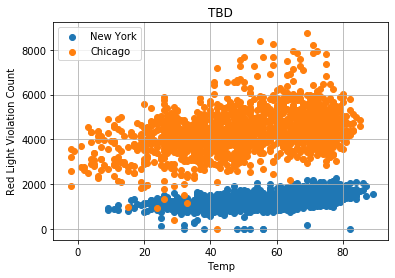

In [148]:
# plot data
plt.scatter(NY_Daily_Weather_2.index, NY_Daily_Weather_2['Daily Count'], label='New York')
plt.scatter(CHI_Daily_Weather_2.index, CHI_Daily_Weather_2['Daily Total'], label='Chicago')

# set labels and sticks
plt.title("TBD")
plt.xlabel("Temp")
plt.ylabel("Red Light Violation Count")
# plt.xticks(np.arange(0,26,2))

# plt.style.use('seaborn-bright')
plt.legend()
plt.grid()
plt.savefig("Temp vs Violation Count.png")
# Show plot
plt.show()

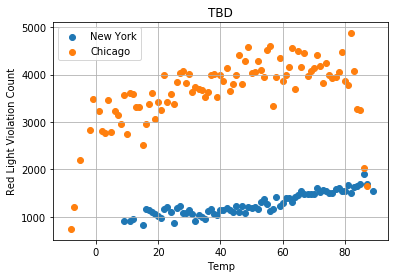

In [119]:
# plot data
x_NY_temp = NY_Daily_Weather_df.index
x_CHI_temp = CHI_Daily_Weather_df.index
y_NY_count = pd.DataFrame(NY_Daily_Weather_2)['Daily Count']
y_CHI_count = pd.DataFrame(CHI_Daily_Weather_2)['Daily Total']
plt.scatter(x_NY_temp, y_NY_count, label='New York')
plt.scatter(x_CHI_temp, y_CHI_count, label='Chicago')

# set labels and sticks
plt.title("TBD")
plt.xlabel("Temp")
plt.ylabel("Red Light Violation Count")
# plt.xticks(np.arange(0,26,2))

# plt.style.use('seaborn-bright')
plt.legend()
plt.grid()
plt.savefig("Temp vs Ave Violation Count.png")
# Show plot
plt.show()